**Stress Detection**

*Ссылка на датасет* https://www.kaggle.com/code/dheerov/stress-detection/notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Сохранил в папку stress/ гружу и вывожу .head
stressed_df = pd.read_csv('stress/data_stress.csv')
stressed_df.head(5)

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


**Описание данных:**

**snoring range** - *громкость храпа в дБ, дробная с точностью до сотых, количественная, непрерывная;*\
**respiration rate** - *количество дыхательных циклов в минуту, дробные с точностью до сотых, количественная, непрерывная;*\
**body tempreture** - *температура тела в градусах по F, дробная с точностью до тысячных, количественная, непрерывная;*\
**limb movement** - *движения конечностей в час(?), дробная с точностью до сотых, количественная, непрерывная;*\
**blood oxygen** - *процентное содержание кислорода в крови (сатурация), дробная с точностью до сотых, количественная, непрерывная;*\
**eye movement** - *количество движений глаз в час(?), дробная с точностью до сотых, количественная, непрерывная;*\
**hours of sleep** - *часы сна, дробная с точностью до тысячных, количественная, непрерывная;*\
**heart rate** - *средняя частота сердечных сокращений в минуту, дробная с точностью до сотых, количественная, непрерывная;*\
**Stress levels** - *уровень стресса 0-4, целое, категориальная.*

In [3]:
# Общая информация, всего 9 колонок, 8 из которых с типом данных float64 и 1 - int64
stressed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring range     630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  614 non-null    float64
 3   limb movement     618 non-null    float64
 4   blood oxygen      626 non-null    float64
 5   eye movement      612 non-null    float64
 6   hours of sleep    619 non-null    float64
 7   heart rate        606 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [4]:
# Подсчет пропусков (количественный)
missed_vals = stressed_df.isnull().sum()
print(f'Число пропущенных значений в полях:\n{missed_vals}')

Число пропущенных значений в полях:
snoring range        0
respiration rate     0
body temperature    16
limb movement       12
blood oxygen         4
eye movement        18
hours of sleep      11
heart rate          24
Stress Levels        0
dtype: int64


In [5]:
# Подсчет пропусков (процентн) - как критерий оценки критичности числа пропусков
missed_vals_percent = (missed_vals / len(stressed_df)) * 100
print(f'Процент пропущенных значений:\n{missed_vals_percent.round(2)}')

Процент пропущенных значений:
snoring range       0.00
respiration rate    0.00
body temperature    2.54
limb movement       1.90
blood oxygen        0.63
eye movement        2.86
hours of sleep      1.75
heart rate          3.81
Stress Levels       0.00
dtype: float64


*Замечание: в целом 2-4% пропусков - это не критично, для данных признаков можно заменить пропуски медианным значением*

In [6]:
# Глянем, что даст describe()
stressed_df.describe()

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
count,630.000000,630.000000,614.000000,618.000000,626.000000,612.000000,619.000000,606.000000,630.000000
mean,71.600000,21.916314,93.472055,11.945188,91.047920,88.964673,3.835742,64.901733,2.000000
std,19.372833,4.336242,6.833370,5.001250,4.891833,13.480426,3.341316,11.260908,1.415337
min,45.000000,16.000000,85.000000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.580000,8.516000,88.484000,81.230000,0.472000,56.210000,1.000000
50%,70.000000,21.016000,93.080000,11.048000,91.000000,90.080000,3.608000,62.540000,2.000000
75%,91.250000,25.064000,95.596000,15.950000,94.274000,98.890000,6.592000,72.740000,3.000000
max,100.000000,48.560000,166.230000,46.800000,154.300000,185.360000,20.220000,158.650000,4.000000


*Замечание: Я не врач, но 166.23 по Фаренгейту в поле "температура тела"(body temperature) - это 100% выброс или ошибка, тк это равнаяется 74,44 градусам по Цельсию, человек не может иметь такую температуру тела. Аналогично можно сказать про содержание кислорода в крови и пульс. По минимальным значениям явных ошибок не наблюдаю, однако максимальные значения в полях "частота сердечных сокращений", "содержание кислорода в крови" и "часы сна" требуют более детальной оценки.*

In [7]:
# Также резонно посмотреть медианные значения.
stressed_df.median()

snoring range       70.000
respiration rate    21.016
body temperature    93.080
limb movement       11.048
blood oxygen        91.000
eye movement        90.080
hours of sleep       3.608
heart rate          62.540
Stress Levels        2.000
dtype: float64

*Наблюдение: Навскидку среднее и медиана отличаются незначительно, можно предположить, что распределение близко к нормальному.*

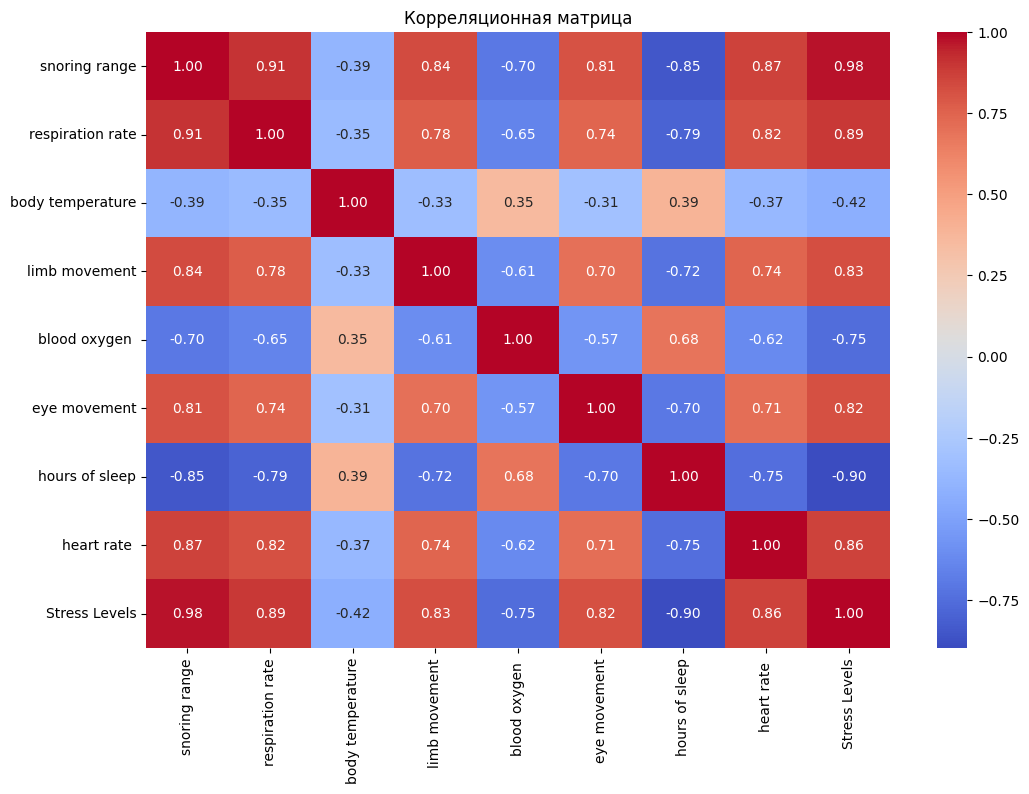

In [8]:
# Немножко визуализирую, может что-то пойму... Начну с корреляционной матрицы (да вот прям сразу из пушки по воробьям)
plt.figure(figsize=(12,8))
corr_matrix = stressed_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Корреляционная матрица')
plt.show()

**Важный вывод:**
*Вот прям сразу можем проследить корреляцию например между движением конечностей и пульсом, уровнем стресса и храпом, длительностью сна и количеством кислорода в крови (вообще это параметр, который действительно очень влияет на качество сна, именно поэтому мы так хорошо спим в загородном доме вблизи леса). Чисто с медицинской точки зрения, матрица выглядит очень реалистично.*

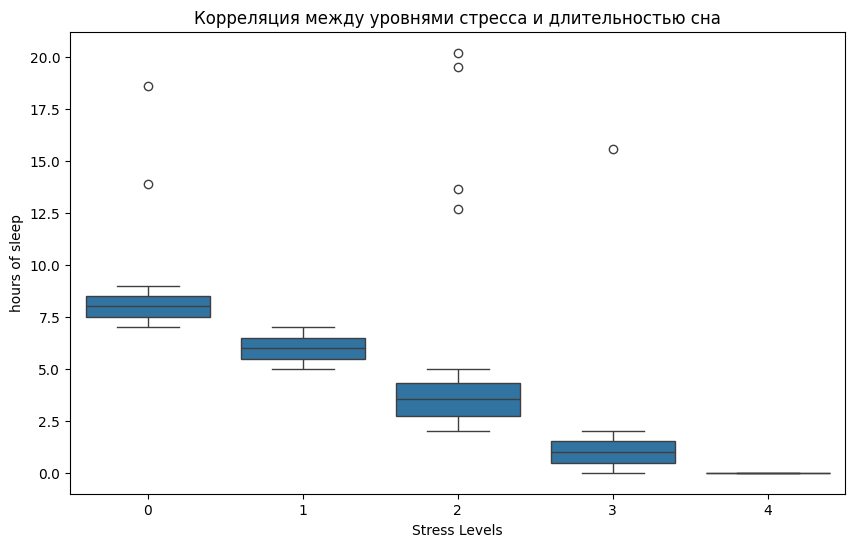

In [9]:
# Кстати о корреляции между уровнем стресса и длительностью сна...
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Levels', y='hours of sleep', data=stressed_df)
plt.title('Корреляция между уровнями стресса и длительностью сна')
plt.show()

*Выводы: Ну, как по мне тут вполне очивидно, если исключить аномальные значения, то в общем можно сказать, что чем выше уровень стресса, тем менее продолжительный сон у человека. Очень жизненно кстати.*

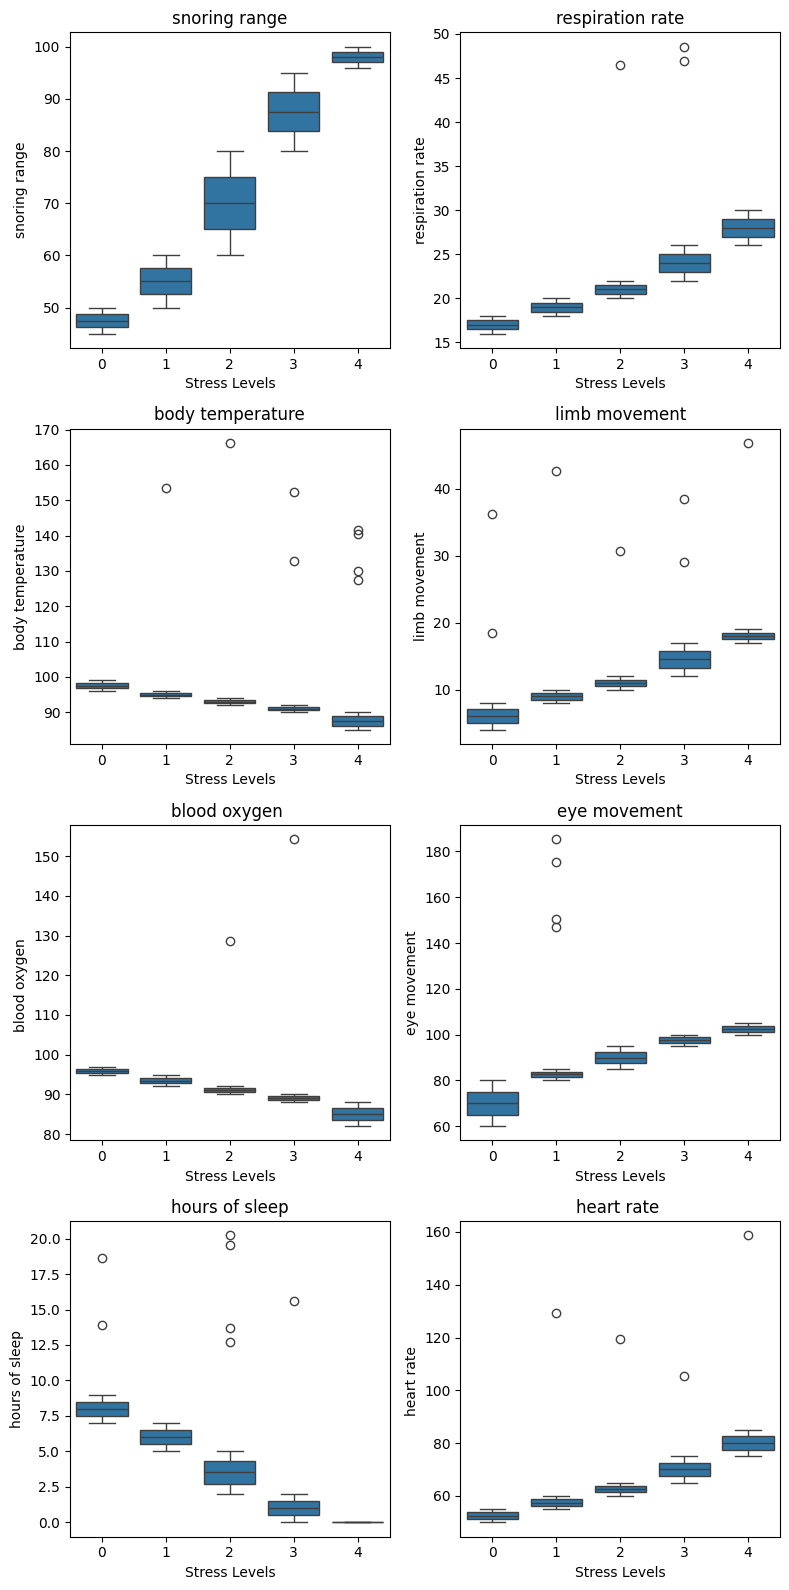

In [10]:
features = stressed_df.columns[0:-1]
plt.figure(figsize=(8,16))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='Stress Levels', y=feature, data=stressed_df)
    plt.title(feature)
plt.tight_layout()
plt.show()

*Наблюдение: В общем-то тут наглядно видны выбросы, а также корреляция между нашими фичами и уровнем стресса.*